In [1]:
import pandas as pd

#!pip install pyarrow
#!pip  install fastparquet 

In [ ]:
df = pd.read_parquet('/run/media/eva/01DA95886B3817A0/Mathfiles/4d-poly/polytopes-4d-16-vertices.parquet')
df.head()
file_name = f'/run/media/eva/01DA95886B3817A0/Mathfiles/4d-poly/polytopes-4d-{i:02}-vertices.parquet'  # Adjust the file naming convention if needed


File /run/media/eva/01DA95886B3817A0/Mathfiles/4d-poly/polytopes-4d-34-vertices.parquet not found
File /run/media/eva/01DA95886B3817A0/Mathfiles/4d-poly/polytopes-4d-35-vertices.parquet not found


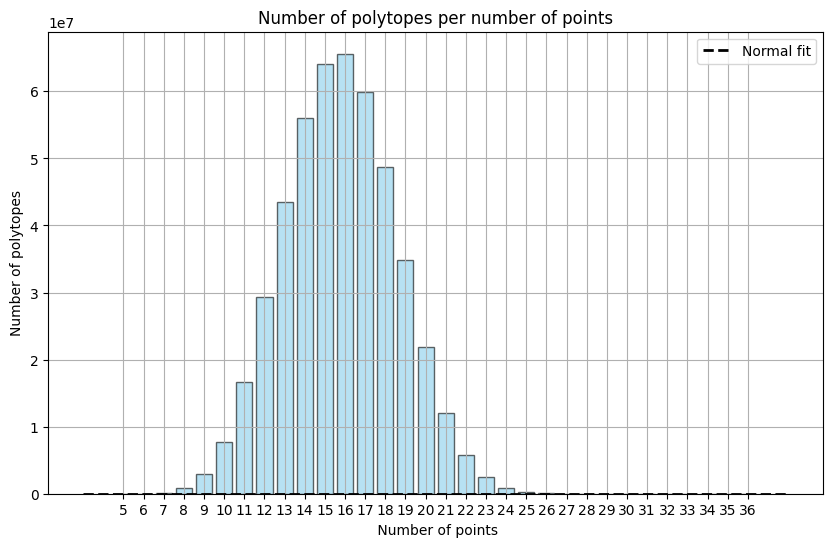

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skewnorm, norm, lognorm, gamma
import pyarrow.parquet as pq
# List to store the number of rows in each file
rows_counts = []

# Iterate through the range from 5 to 36
for i in range(5, 36 + 1):
    # Format the file name with leading zeros if needed
    file_name = f'/run/media/eva/01DA95886B3817A0/Mathfiles/4d-poly/polytopes-4d-{i:02}-vertices.parquet'  # Adjust the file naming convention if needed
    try:
        # Open the Parquet file
        parquet_file = pq.ParquetFile(file_name)
        # Get the number of rows
        num_rows = parquet_file.metadata.num_rows
        # Append the number of rows to the list
        rows_counts.append((i, num_rows))
    except FileNotFoundError:
        print(f"File {file_name} not found")
        rows_counts.append((i, 0))
# Convert the list to a DataFrame for easier plotting
rows_df = pd.DataFrame(rows_counts, columns=['file_number', 'row_count'])

# Plot the bar plot of file number vs number of rows
plt.figure(figsize=(10, 6))
plt.bar(rows_df['file_number'], rows_df['row_count'], color='skyblue', edgecolor='black', alpha=0.6)
plt.xlabel(' Number of points')
plt.ylabel('Number of polytopes')
plt.title('Number of polytopes per number of points')
plt.xticks(range(5, 37))  # Ensure all file numbers are shown on the x-axis
plt.grid(True)

# Extract the row counts for distribution fitting
row_counts = rows_df['row_count'].values

# Fit a normal distribution to the data
mu, std = norm.fit(row_counts)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot the fitted normal distribution
plt.plot(x, p * len(row_counts), 'k--', linewidth=2, label='Normal fit')
plt.legend()

output_file = f'/home/eva/Math/polytopes/Histograms/numpolypervertices.png'
plt.savefig(output_file)

plt.show()


In [21]:
print(rows_counts)

[(5, 1561), (6, 24189), (7, 177446), (8, 834638), (9, 2867955), (10, 7725801), (11, 16608387), (12, 29270253), (13, 43458000), (14, 56060584), (15, 64085869), (16, 65615931), (17, 59972682), (18, 48703033), (19, 34847821), (20, 21913680), (21, 12070919), (22, 5826221), (23, 2450720), (24, 898929), (25, 284696), (26, 78468), (27, 18417), (28, 3781), (29, 647), (30, 114), (31, 23), (32, 8), (33, 2), (34, 0), (35, 0), (36, 1)]


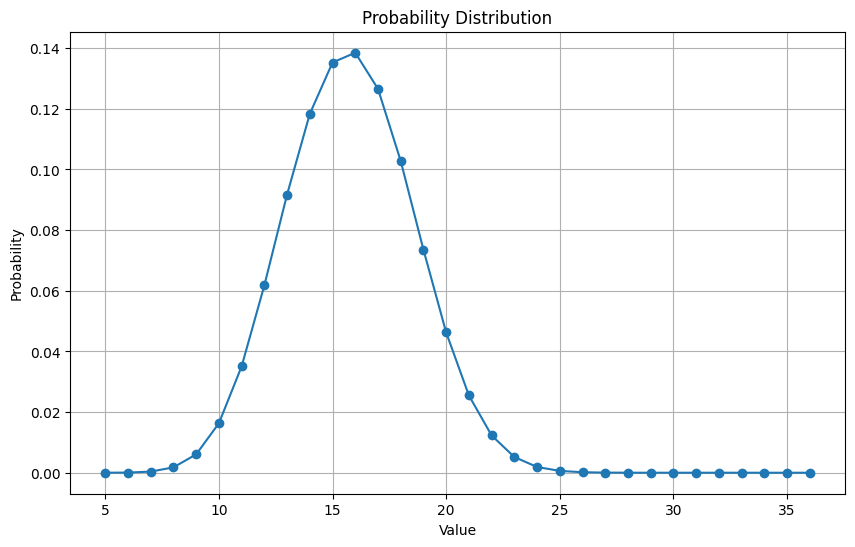

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data points
data = [
    (5, 1561), (6, 24189), (7, 177446), (8, 834638), (9, 2867955), 
    (10, 7725801), (11, 16608387), (12, 29270253), (13, 43458000), 
    (14, 56060584), (15, 64085869), (16, 65615931), (17, 59972682), 
    (18, 48703033), (19, 34847821), (20, 21913680), (21, 12070919), 
    (22, 5826221), (23, 2450720), (24, 898929), (25, 284696), (26, 78468), 
    (27, 18417), (28, 3781), (29, 647), (30, 114), (31, 23), (32, 8), 
    (33, 2), (34, 0), (35, 0), (36, 1)
]

# Extract x and y values
x, y = zip(*data)

# Convert to numpy arrays for probability calculation
x = np.array(x)
y = np.array(y)

# Calculate probabilities
total = y.sum()
probabilities = y / total

# Plot the probability distribution
plt.figure(figsize=(10, 6))
plt.plot(x, probabilities, marker='o')
plt.title('Probability Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


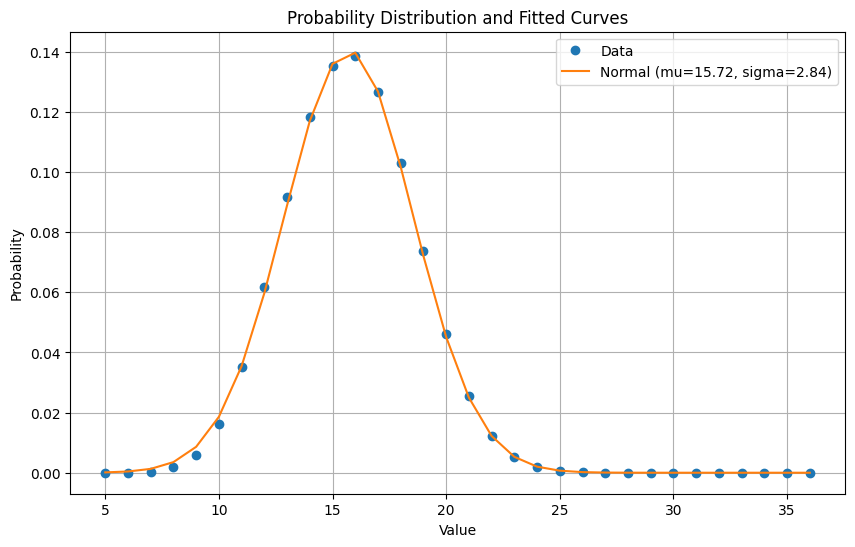

(15.716794893415239, 2.8433542568197)

In [8]:
from scipy.stats import poisson, norm, expon
from scipy.optimize import curve_fit



def normal_pdf(x, mu, sigma):
    return norm.pdf(x, mu, sigma)


# Fit the data to Normal distribution
params_normal, _ = curve_fit(lambda x, mu, sigma: normal_pdf(x, mu, sigma), x, probabilities, p0=[20, 5])
mu_normal, sigma_normal = params_normal



# Plot the distributions
x_values = np.arange(min(x), max(x)+1, 1)
plt.figure(figsize=(10, 6))
plt.plot(x, probabilities, 'o', label='Data')


# Normal
plt.plot(x_values, normal_pdf(x_values, mu_normal, sigma_normal), label=f'Normal (mu={mu_normal:.2f}, sigma={sigma_normal:.2f})')

plt.title('Probability Distribution and Fitted Curves')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)

output_file = f'/home/eva/Math/polytopes/Histograms/probdist.png'
plt.savefig(output_file)

plt.show()




(mu_normal, sigma_normal)


In [31]:
!pip install dask

     |████████████████████████████████| 1.2 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 5.1 MB/s  eta 0:00:01
     |████████████████████████████████| 56 kB 2.2 MB/s  eta 0:00:01


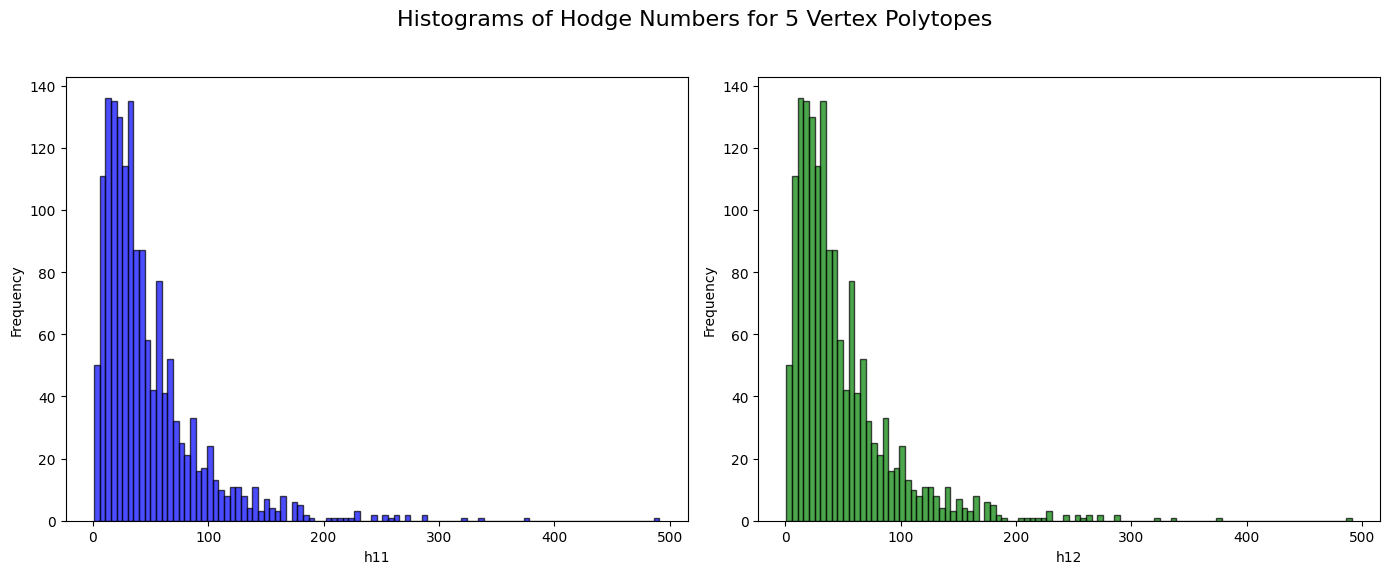

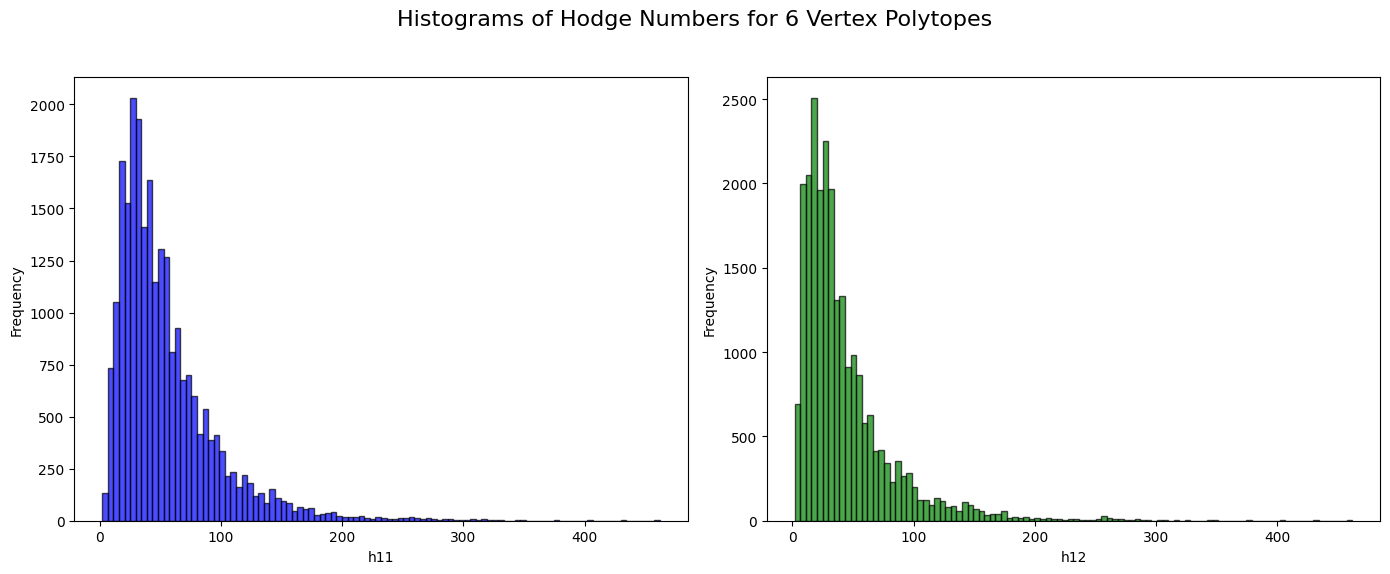

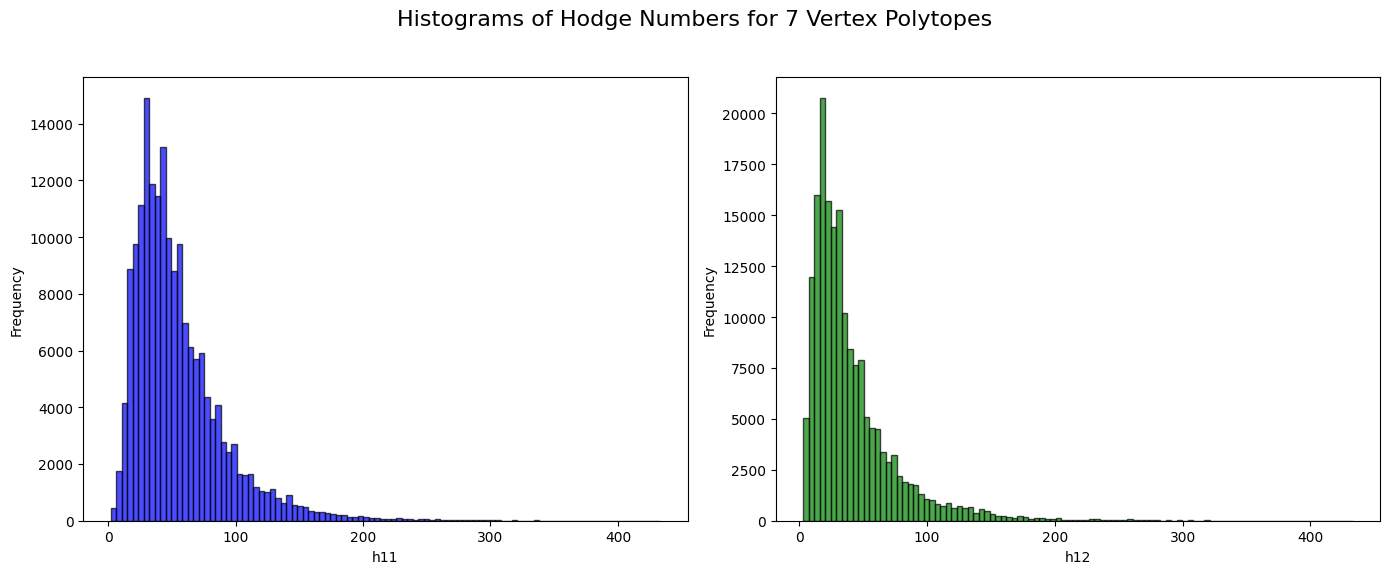

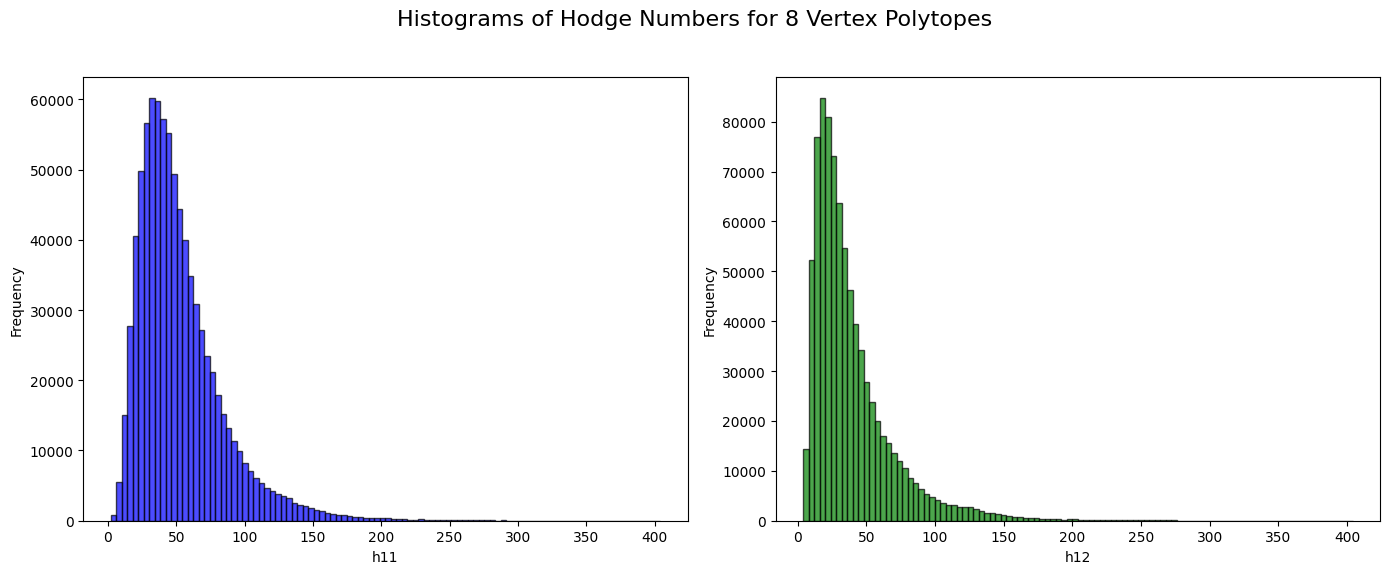

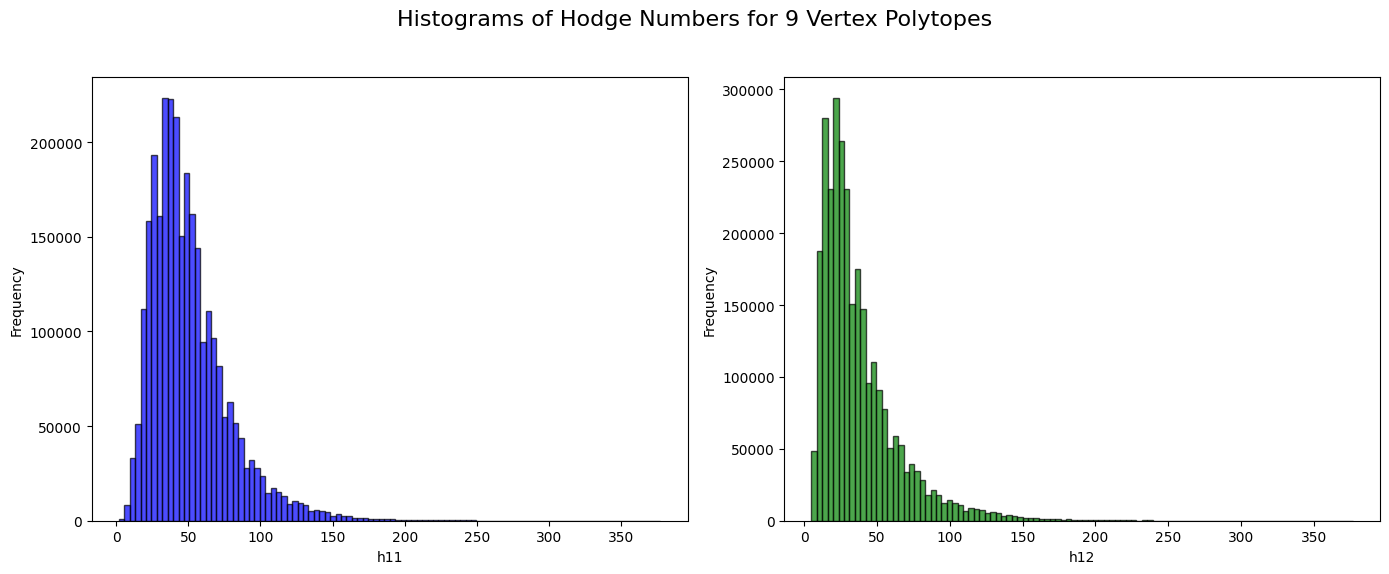

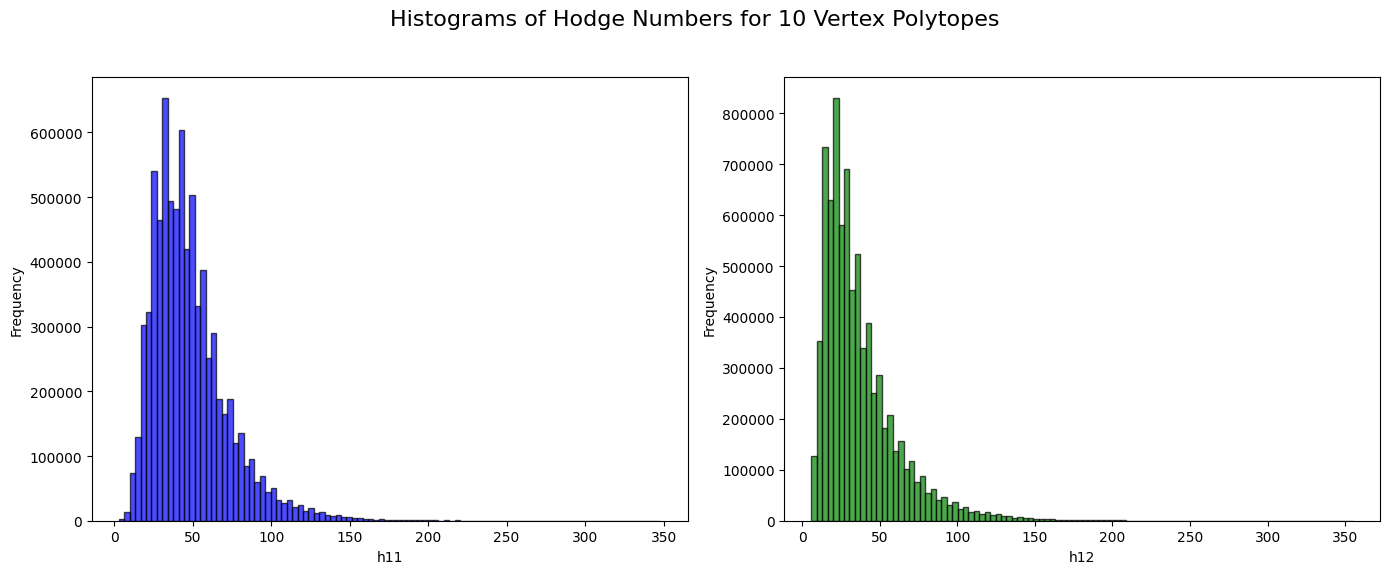

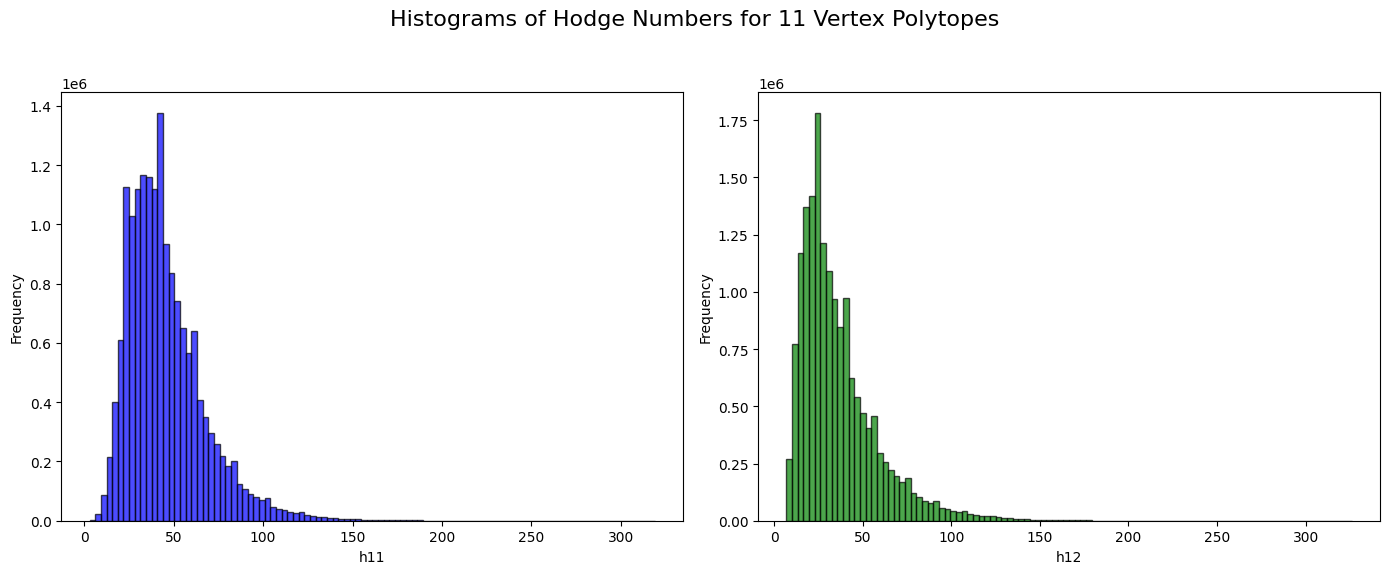

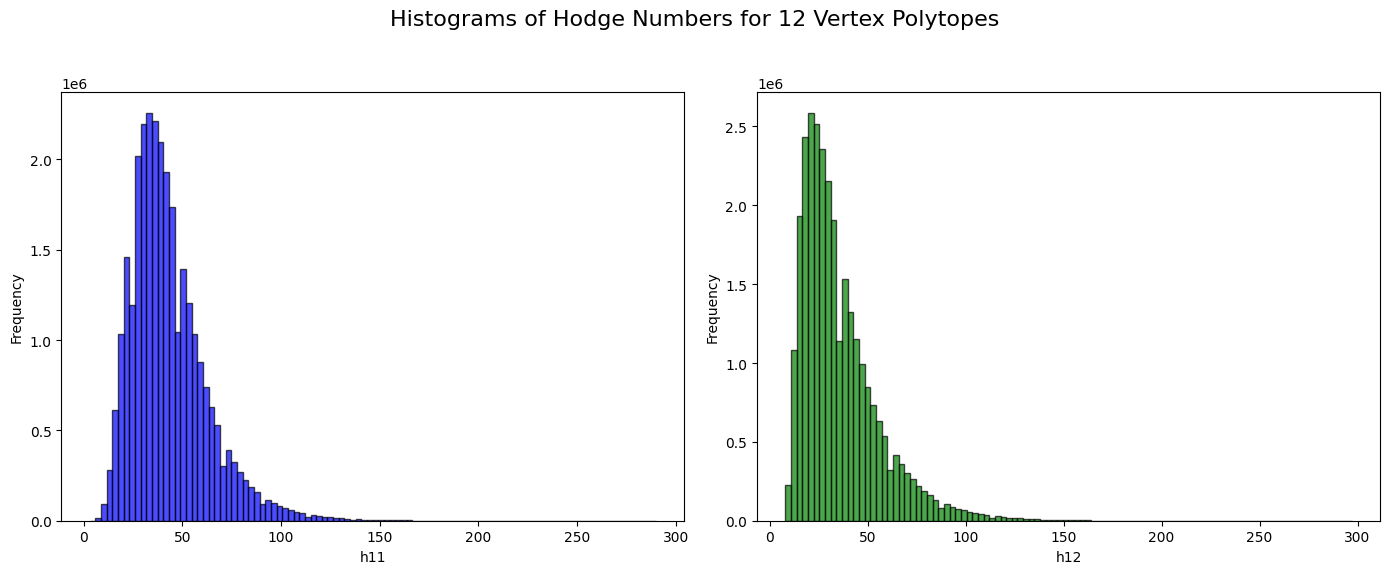

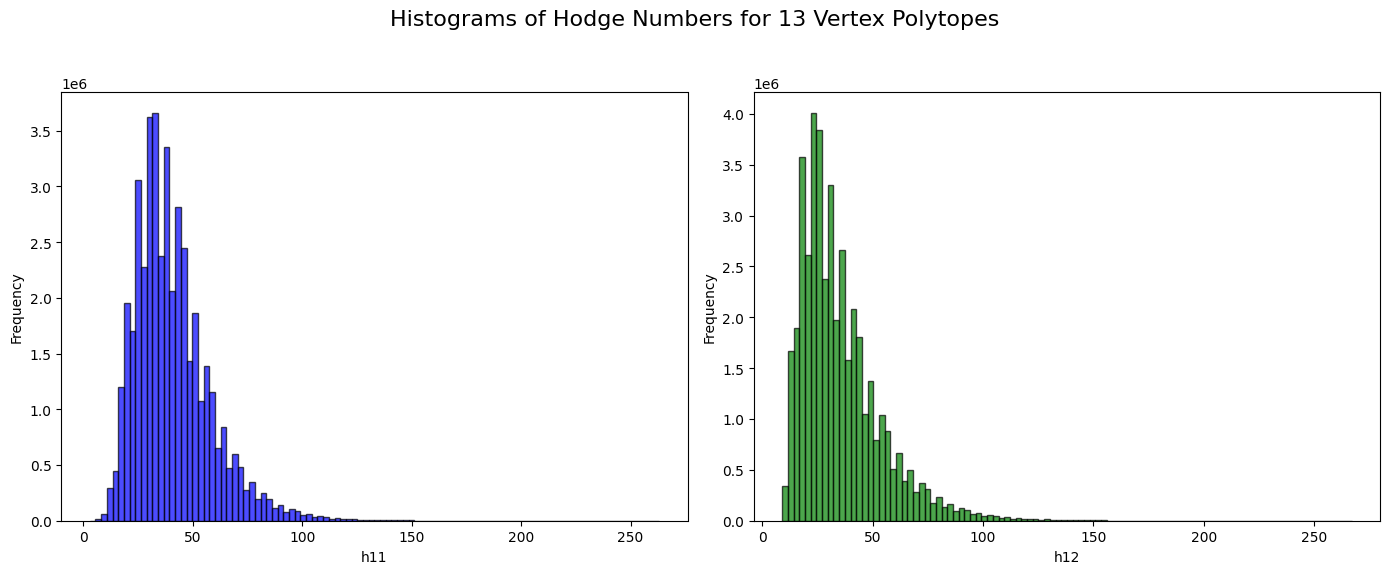

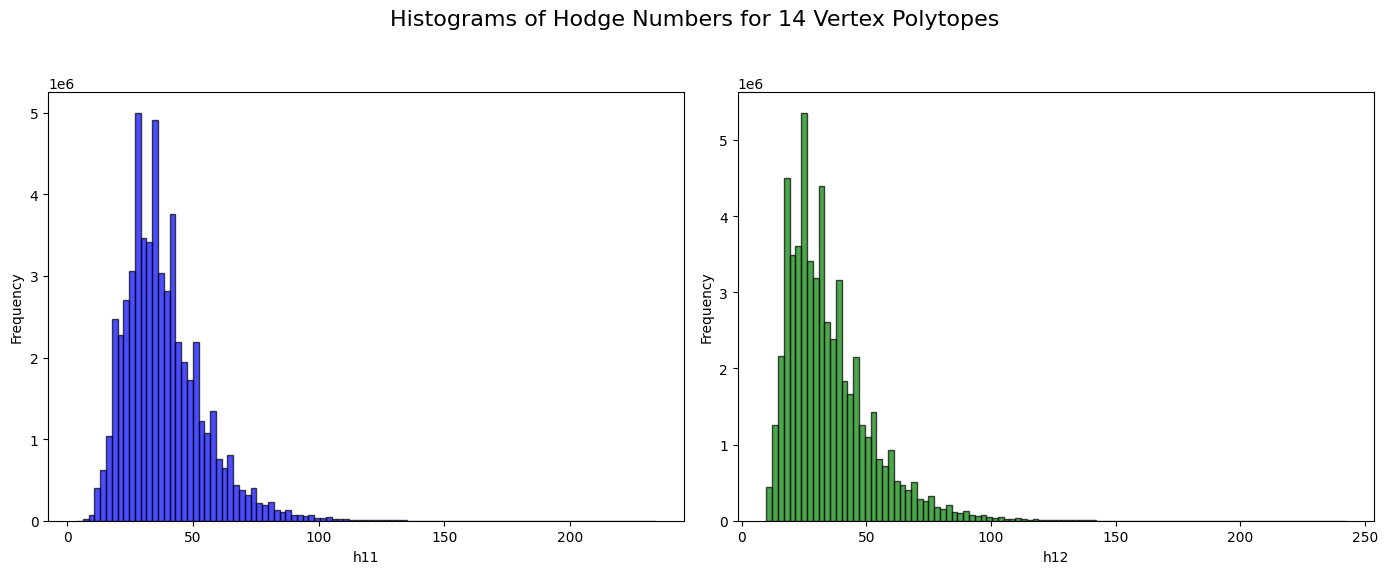

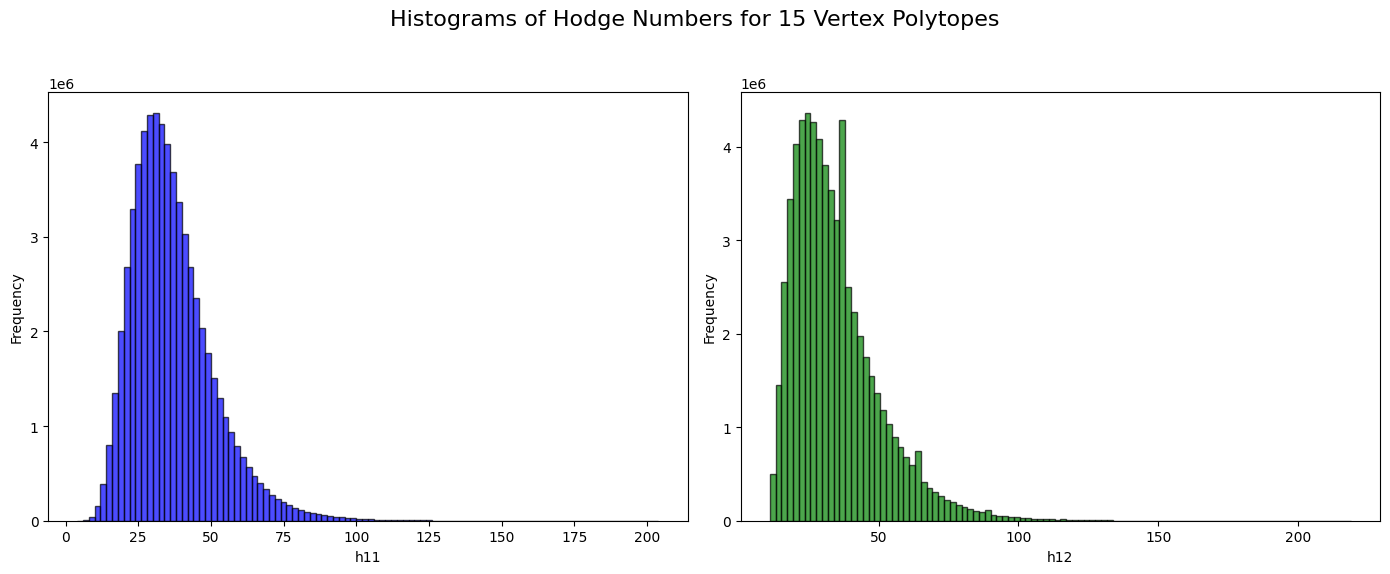

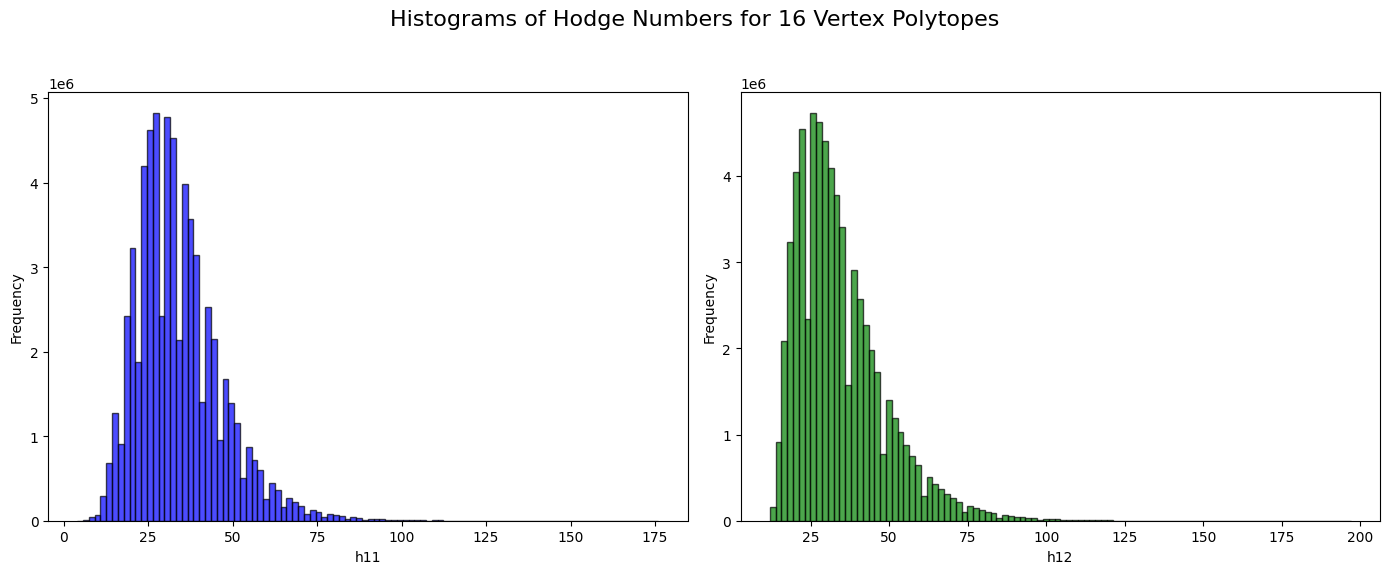

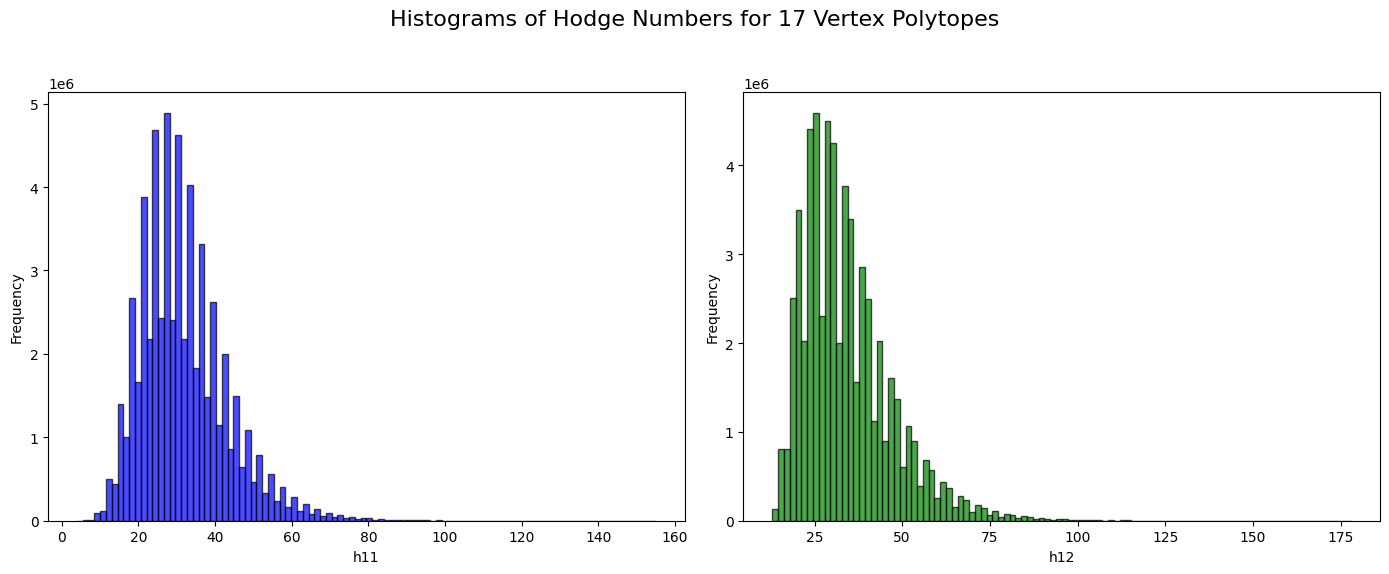

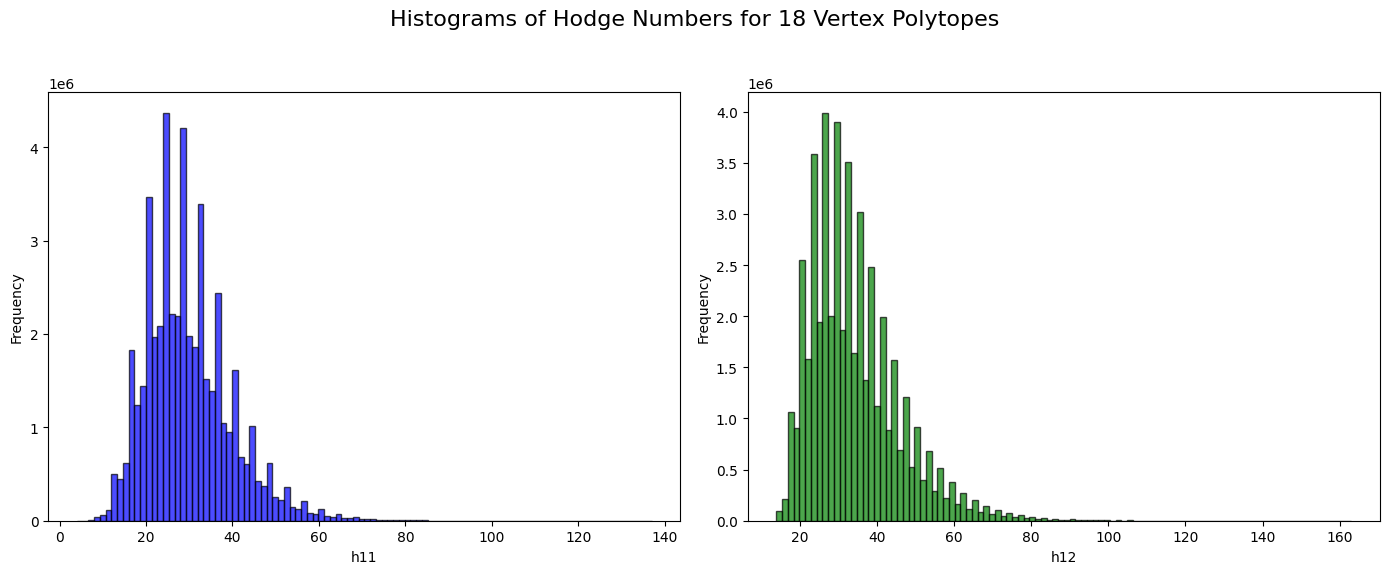

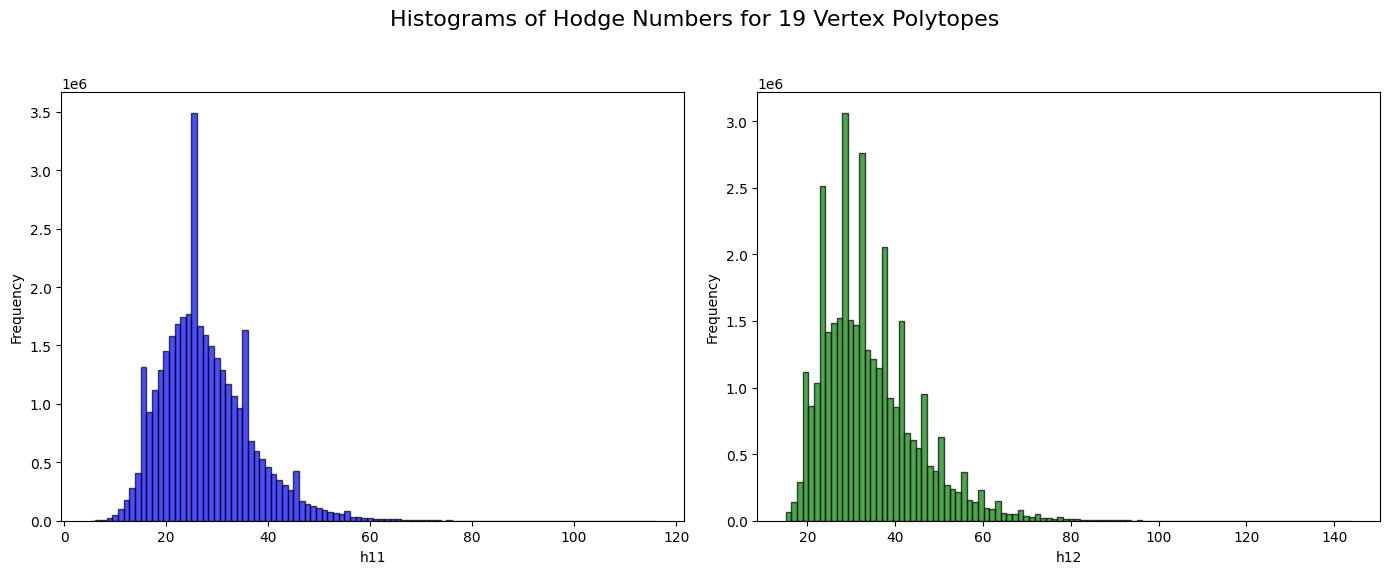

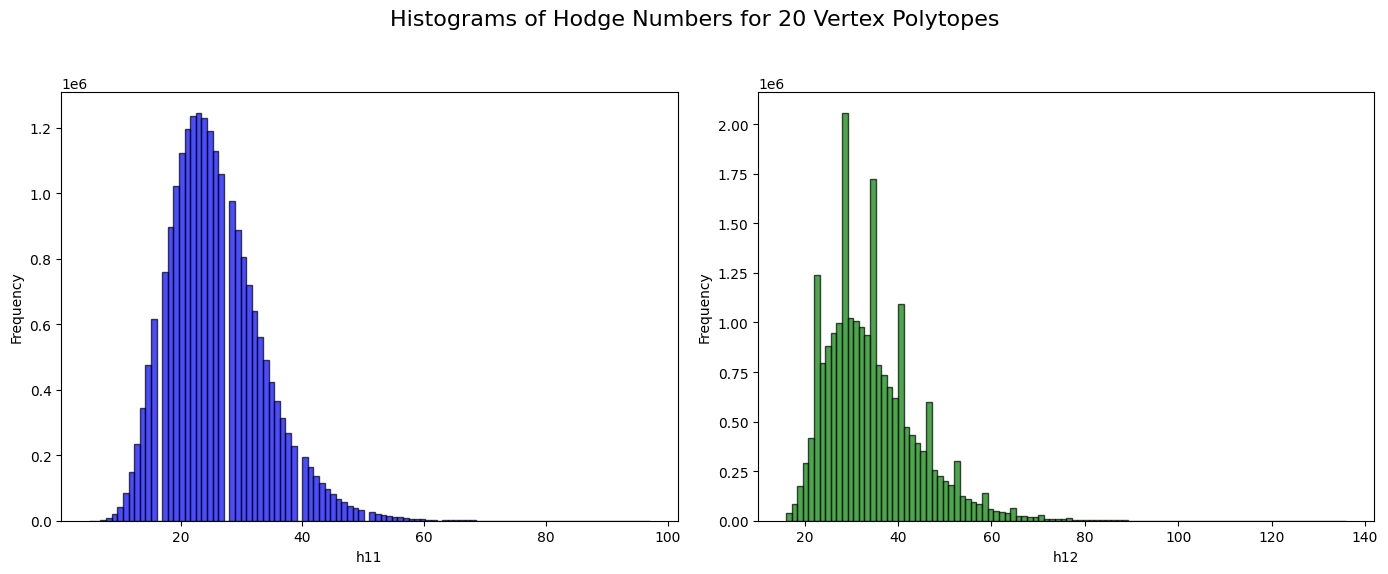

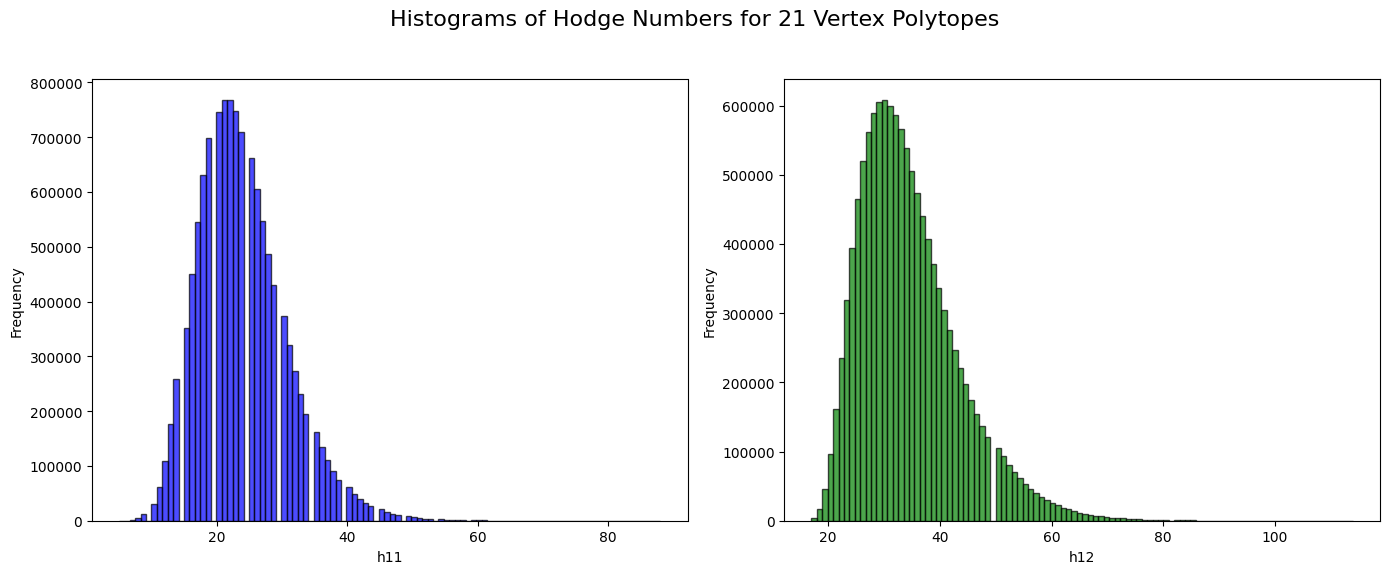

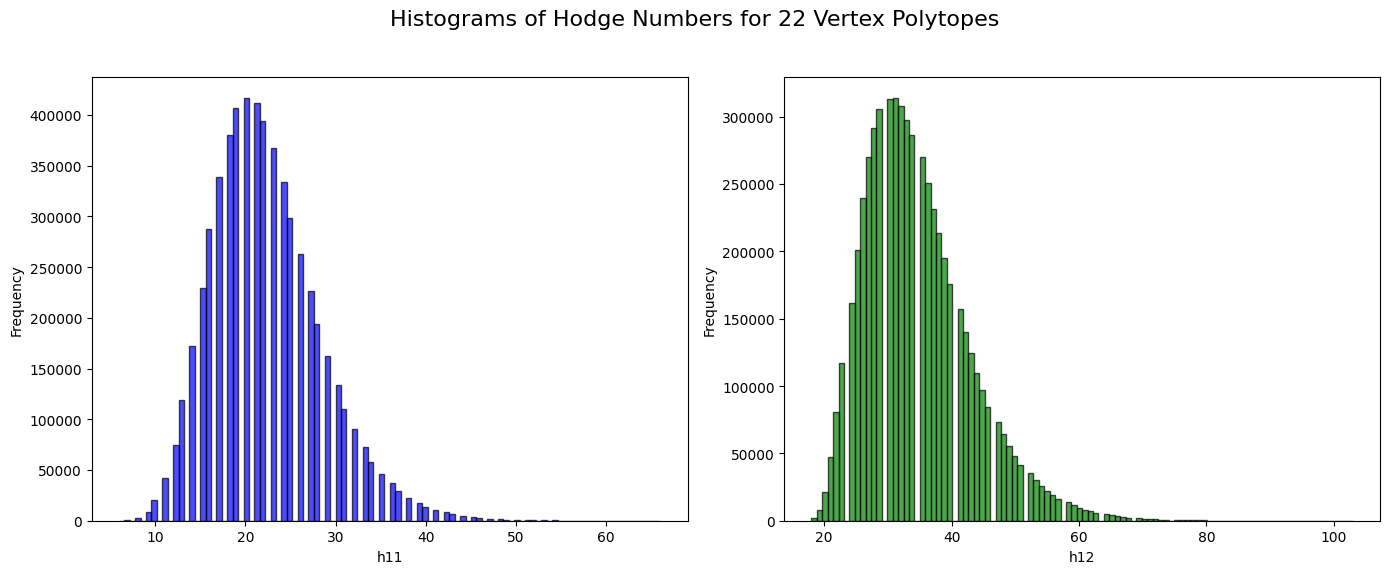

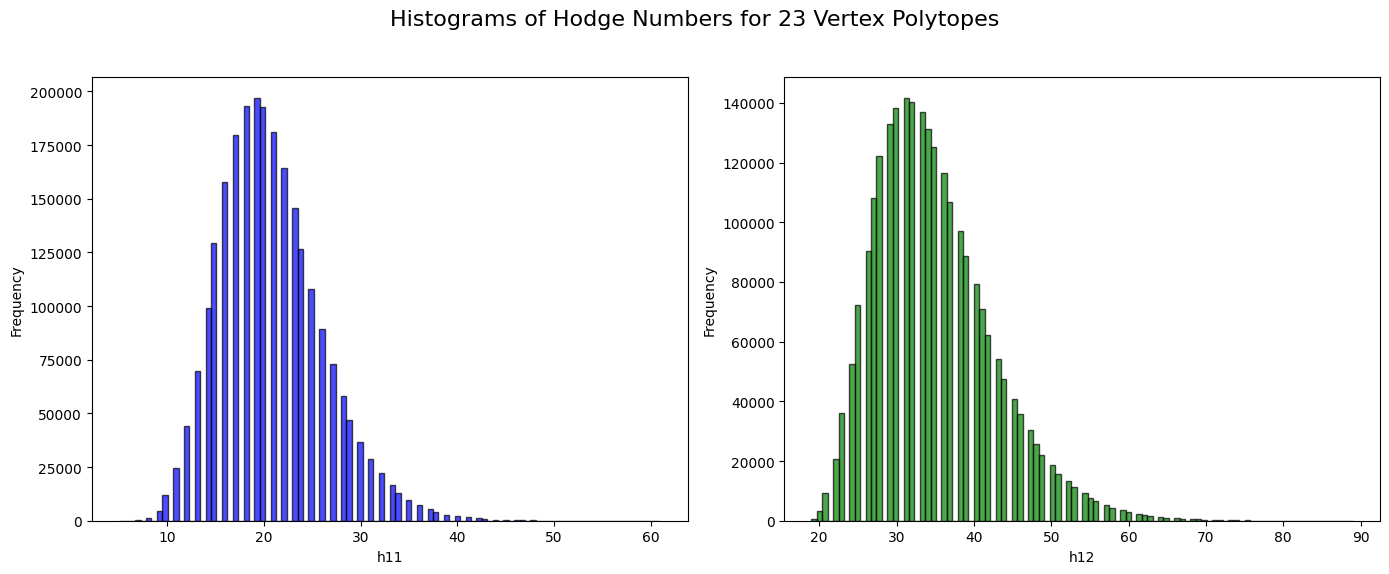

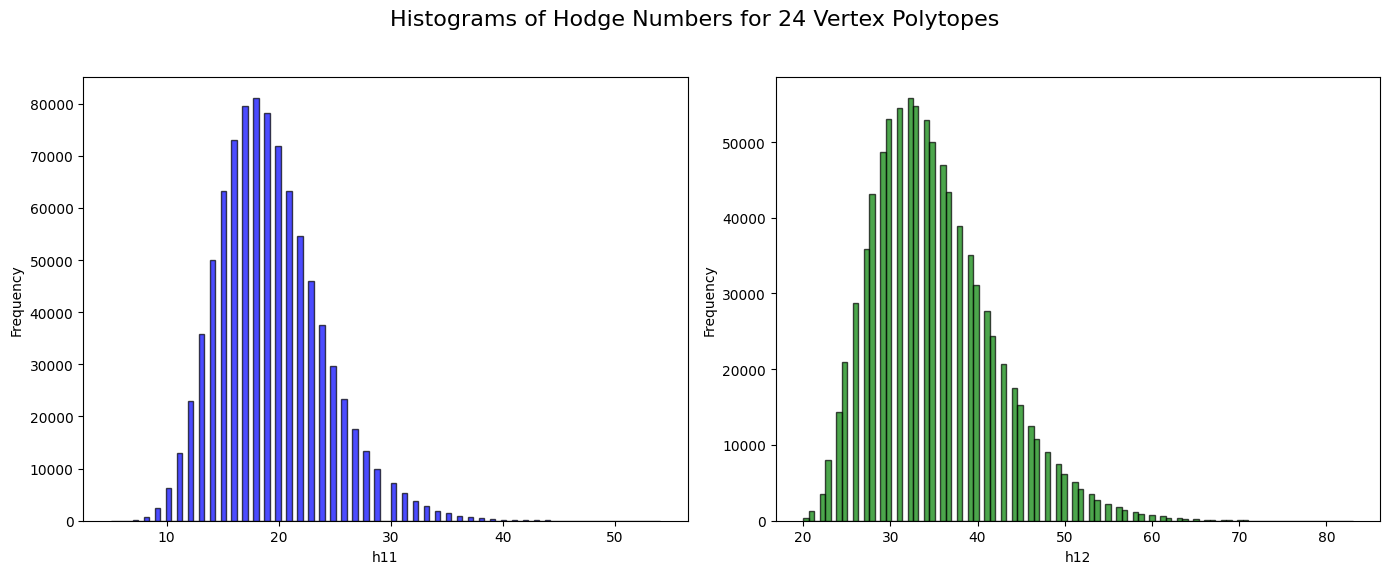

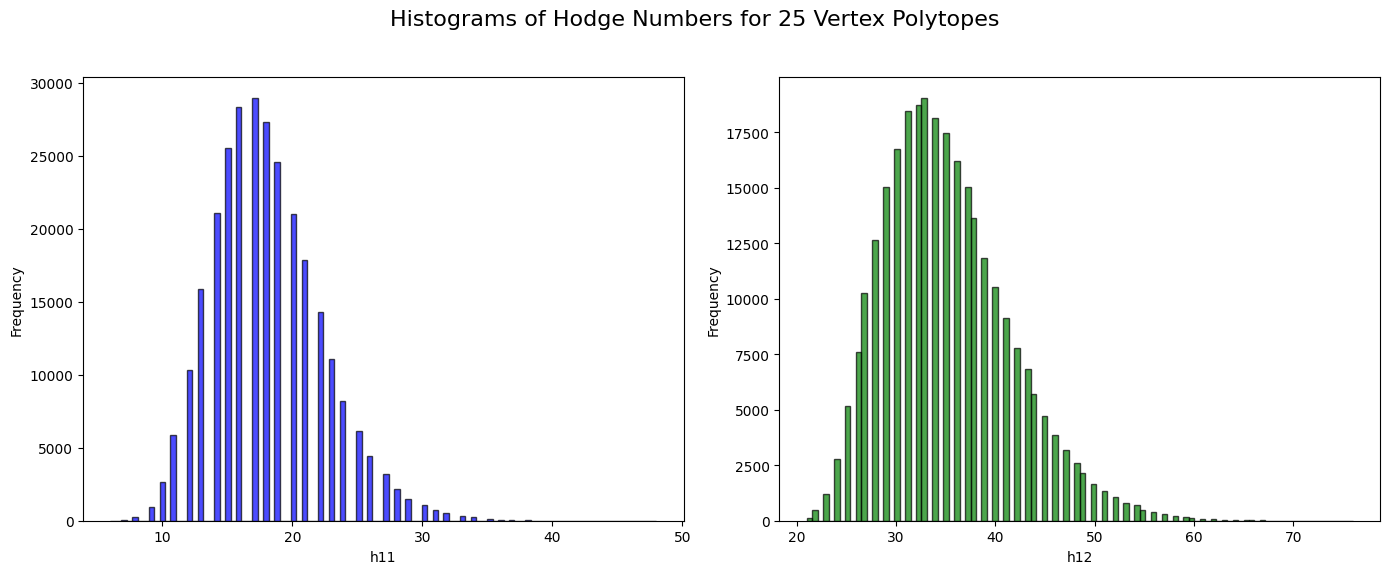

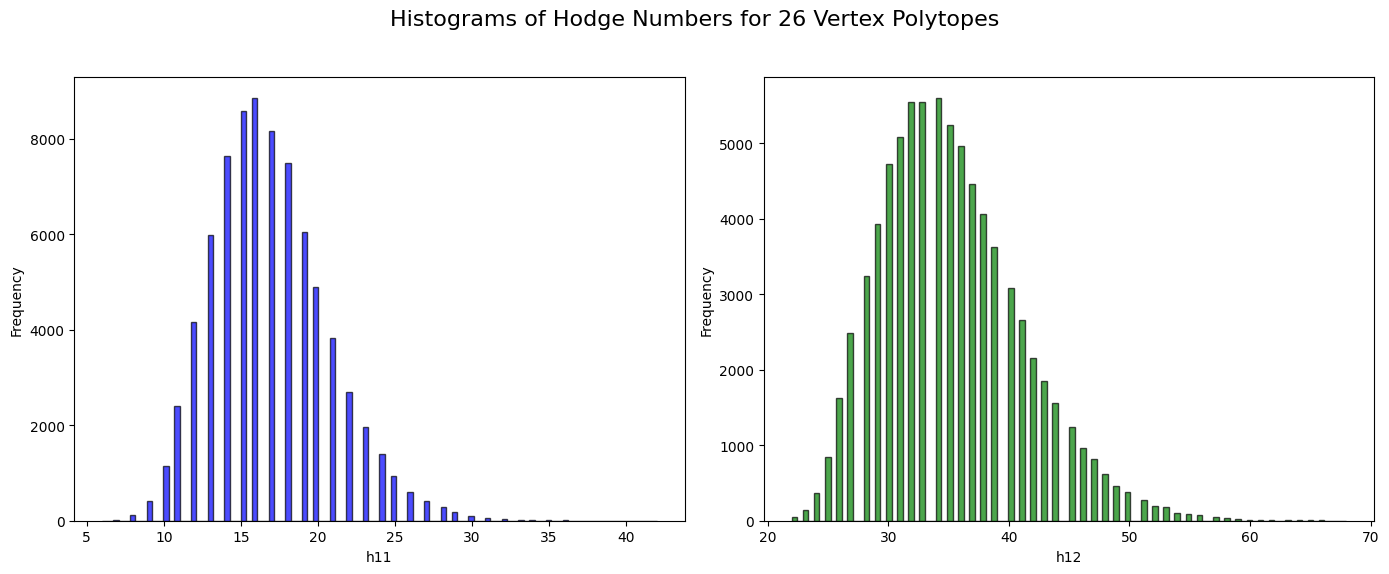

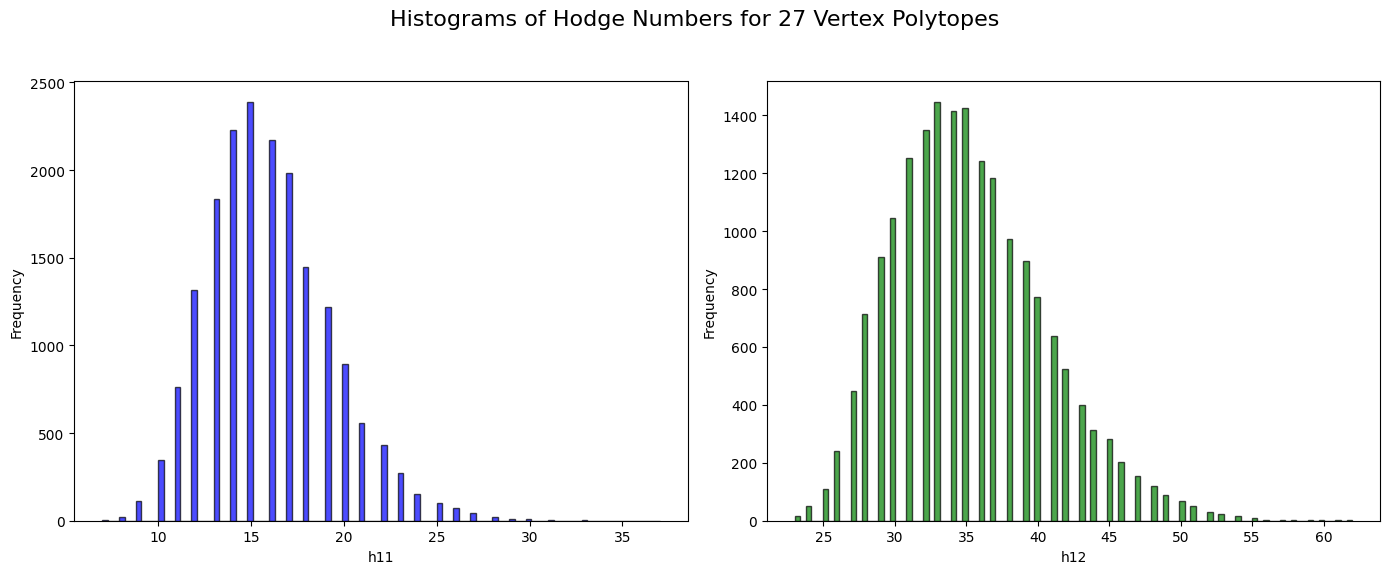

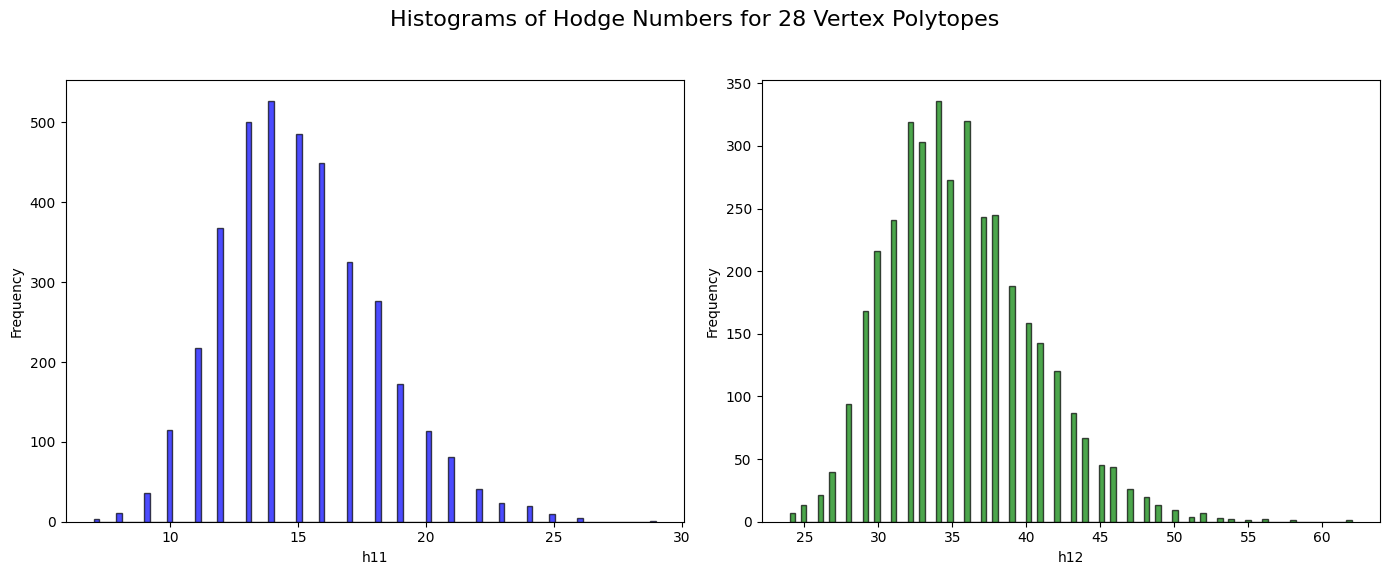

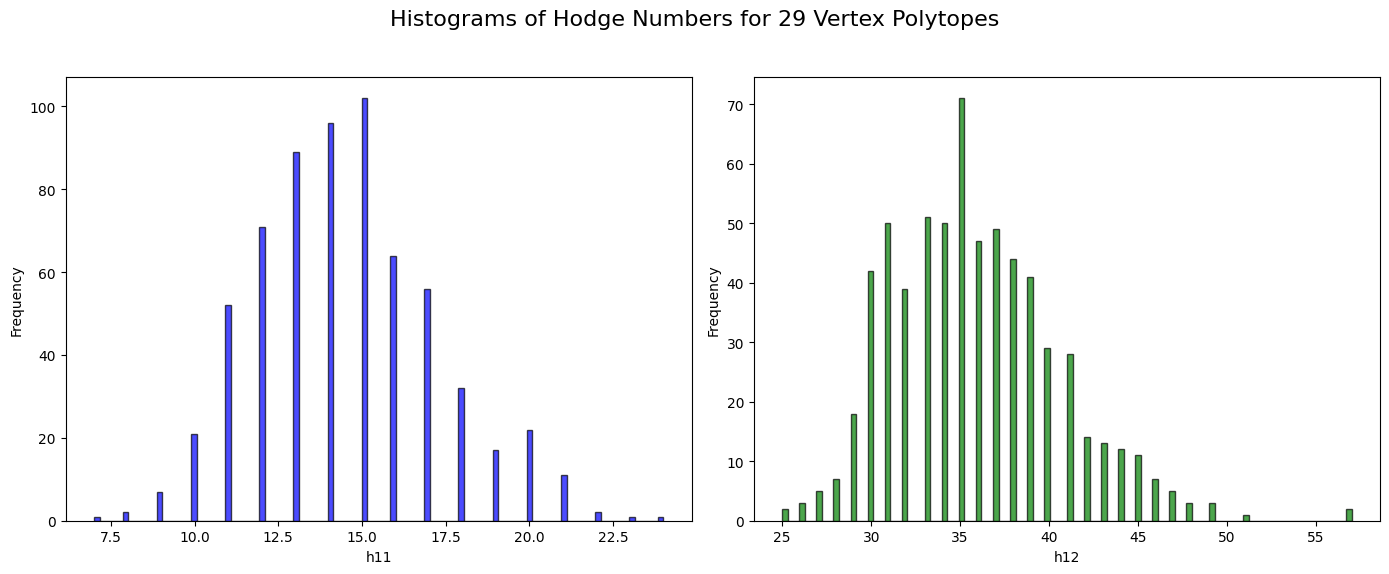

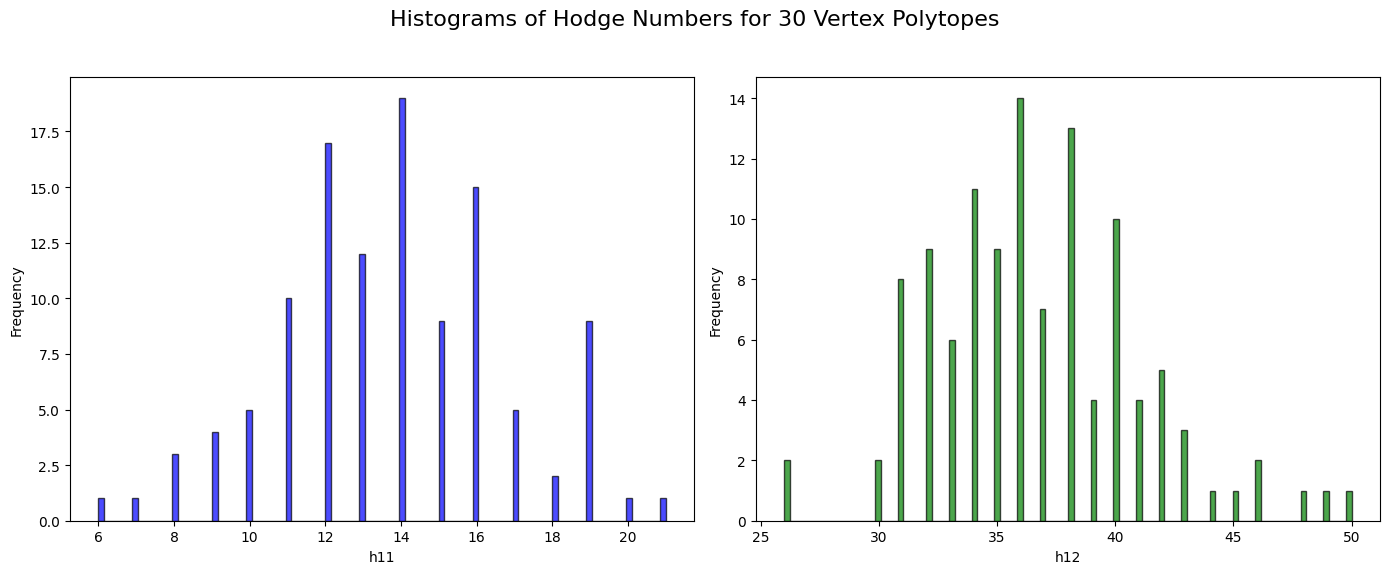

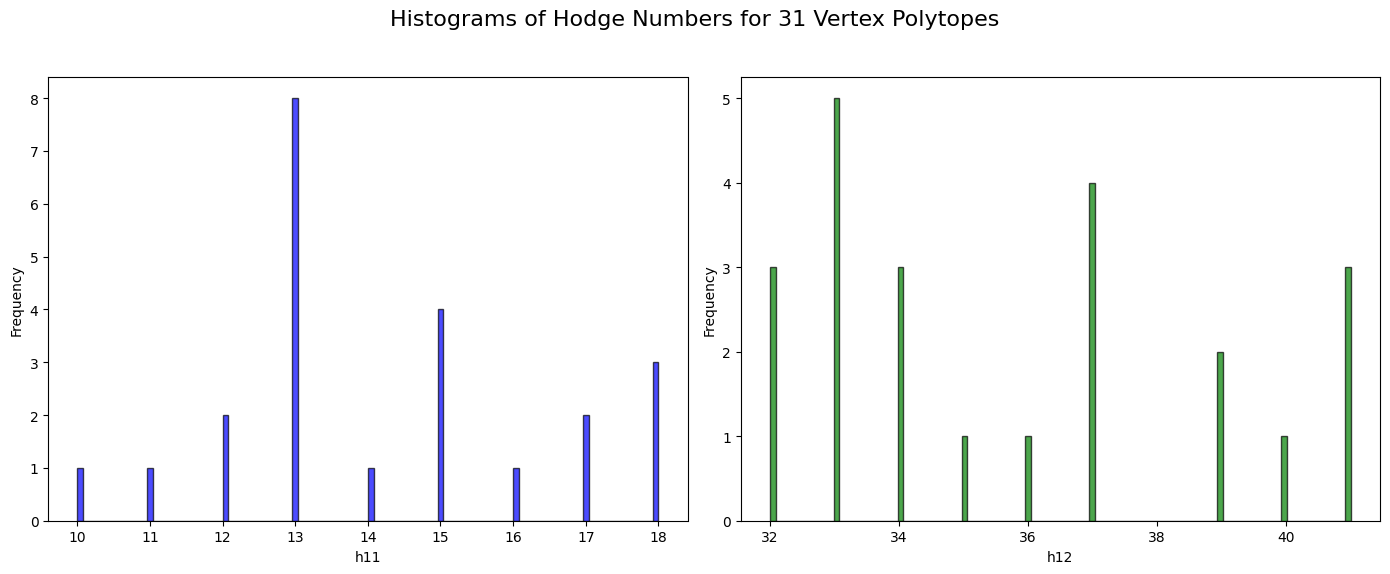

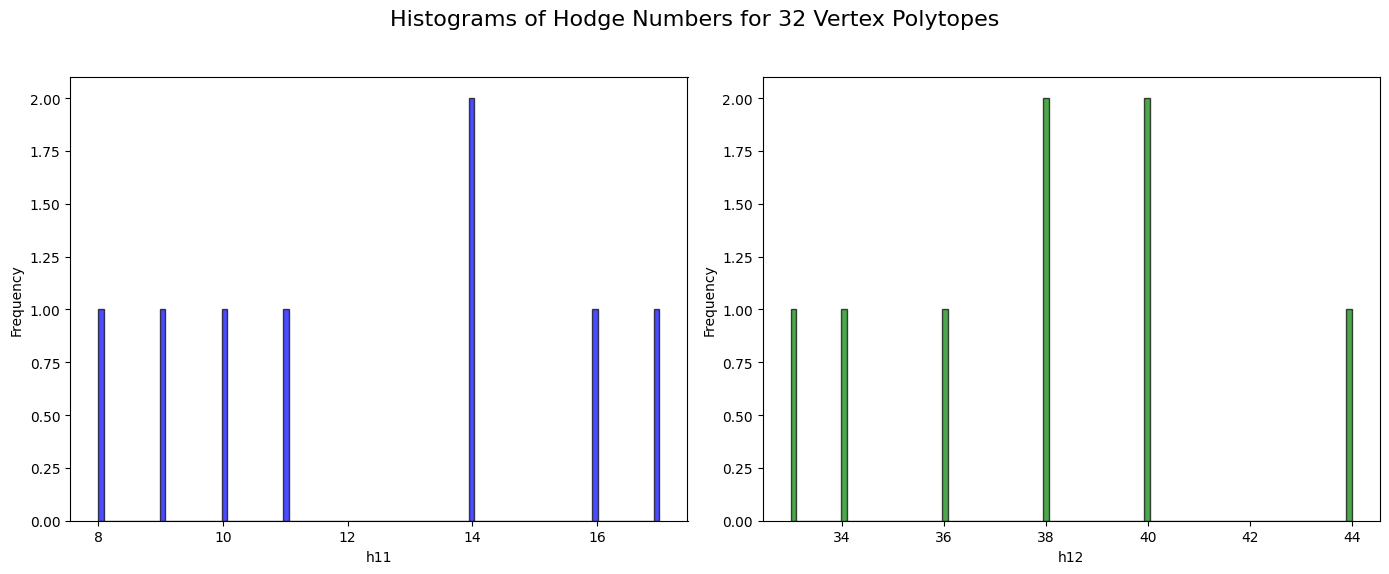

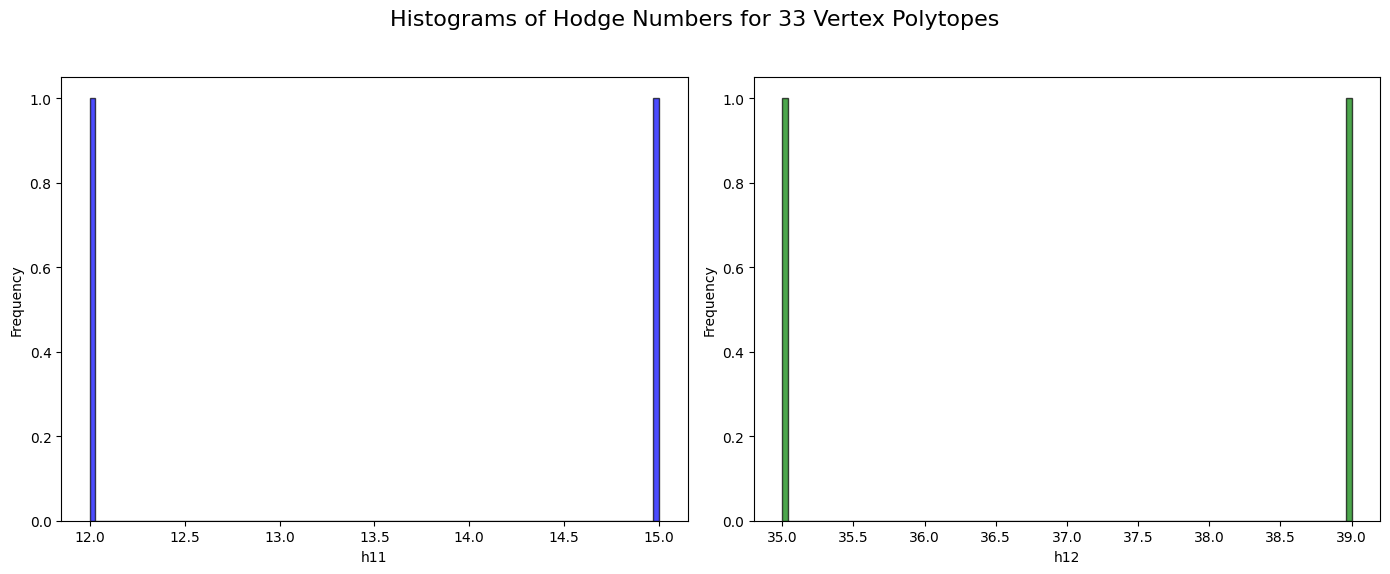

File /run/media/eva/01DA95886B3817A0/Mathfiles/4d-poly/polytopes-4d-34-vertices.parquet not found
File /run/media/eva/01DA95886B3817A0/Mathfiles/4d-poly/polytopes-4d-35-vertices.parquet not found


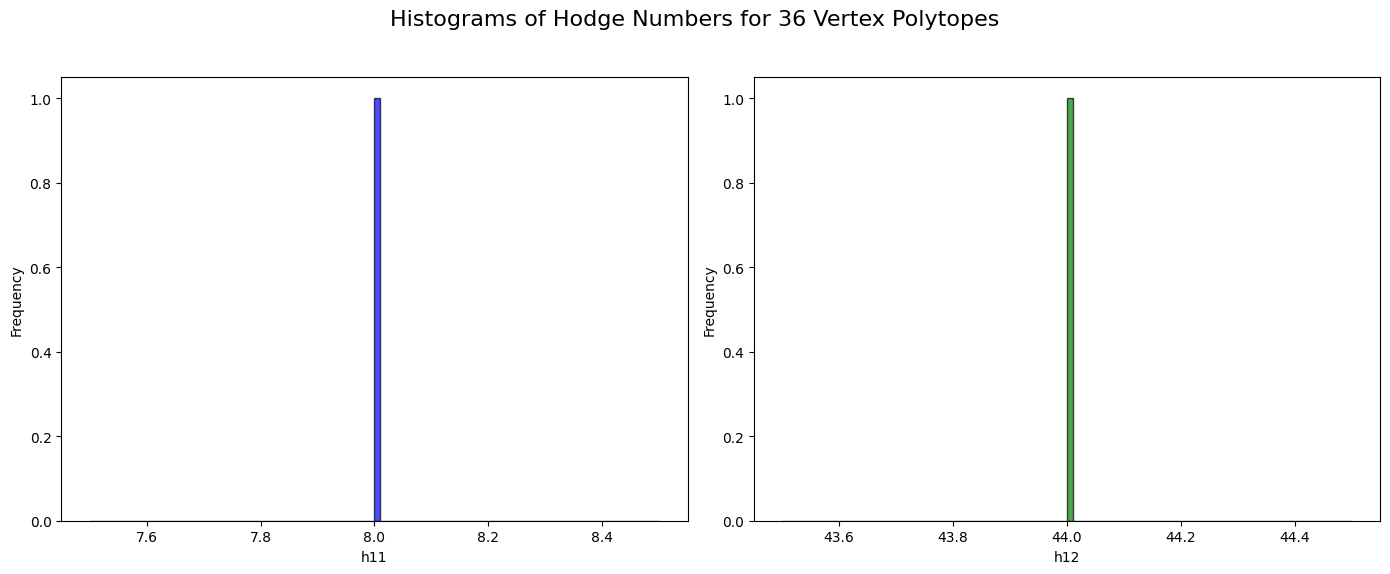

In [9]:
import dask.dataframe as dd
import matplotlib.pyplot as plt


for i in range(5, 36 + 1):
    # Format the file name with leading zeros if needed
    
    try:
        file_name = f'/run/media/eva/01DA95886B3817A0/Mathfiles/4d-poly/polytopes-4d-{i:02}-vertices.parquet'  # Adjust the file naming convention if needed
        qq = dd.read_parquet(file_name)
        
        # Convert the necessary columns to Dask Series
        h11 = qq['h11']
        h12 = qq['h12']
        # Compute the total number of rows


        # Compute the histograms
        h11_hist = h11.compute()
        h12_hist = h12.compute()
        
                
        # Plot the histograms
        plt.figure(figsize=(14, 6))
        plt.suptitle(f'Histograms of Hodge Numbers for {i} Vertex Polytopes', fontsize=16)
        
        # Histogram for h11
        plt.subplot(1, 2, 1)
        plt.hist(h11, bins=100, alpha=0.7, color='blue', edgecolor='black')
        plt.xlabel('h11')
        plt.ylabel('Frequency')
        
        # Histogram for h12
        plt.subplot(1, 2, 2)
        plt.hist(h12, bins=100, alpha=0.7, color='green', edgecolor='black')
        plt.xlabel('h12')
        plt.ylabel('Frequency')
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title
         # Save the plot to a file
        output_file = f'/home/eva/Math/polytopes/Histograms/histograms_hodge_numbers_{i}-vertices.png'
        plt.savefig(output_file)
        
        plt.show()
       
    except FileNotFoundError:
        print(f"File {file_name} not found")
        rows_counts.append((i, 0))
    
 

   